## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [12]:
#Taking the entire training dataset i.e. x_train & y_train as well
samples_tr = x_train.shape[0] + y_train.shape[0]
#Printing the no of training samples
print("The no of training samples are:",samples_tr)

The no of training samples are: 120000


In [13]:
##Taking the entire test dataset i.e. x_test & y_test
samples_te = x_test.shape[0] + y_test.shape[0]
#Printing the no. of test samples
print("The no of test samples are:",samples_te)

The no of test samples are: 20000


### Find dimensions of an image in the dataset

In [14]:
#Since all the images will be of the same size in the dataset, so taking the shape of the 1st image present in the dataset
print("The dimensions of an image in the dataset is :" ,x_train[0].shape)

The dimensions of an image in the dataset is : (28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
#Converting the train & test labels to one hot vectors using the keras library hence firstly importing keras
import keras
#Converting the y_train i.e. train labels to one hot vectors
y_train_enc = keras.utils.to_categorical(y_train)

In [0]:
#Converting the y_test i.e test labels to one hot vectors
y_test_enc = keras.utils.to_categorical(y_test)

In [17]:
y_train_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
y_test_enc

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

### Import the necessary layers from keras to build the model

In [0]:
#Importing the necessary layers
from keras.layers import Conv2D,BatchNormalization,MaxPool2D,Dense,Flatten

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
#Normalizing the train image since the image has only values ranging from 0-255 hence dividing it by 255
x_train_sc = x_train/255
#Normalizing the test image 
x_test_sc = x_test/255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#Importing the sequential model 
from keras.models import Sequential
model = Sequential()

In [27]:
#Reshaping the data to match input dimensions in Conv2D layer in keras which is a 3D array
model.add(keras.layers.Reshape((28,28,1),input_shape=(28,28,)))

In [28]:
#Adding the layers                                                                                                                      
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [29]:
#Adding maxpooling layer 
model.add(MaxPool2D(pool_size=(2,2)))
#Flattening the layer so as to make the input acceptable to the dense layer since it accepts 1D data
model.add(Flatten())
#Introducing 1st Dense layer
model.add(keras.layers.Dense(128, activation='relu'))
#Introducing the dropout to avoid any overfit in the data
model.add(keras.layers.Dropout(0.25))
#Introducing the output layer
model.add(keras.layers.Dense(10, activation='softmax'))
#Compiling the model with adam optimizer & categorical_crossentropy as loss function
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics =['accuracy'])


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [30]:
#Getting the model parameters
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 1)         4         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)              

In [31]:
#Creating the callback function
call = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#Fitting the model
model.fit(x_train_sc,y_train_enc,epochs = 10,batch_size = 64,validation_data=(x_test_sc,y_test_enc),callbacks=[call])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 13s 225us/step - loss: 0.4220 - acc: 0.8492 - val_loss: 0.3032 - val_acc: 0.8878
Epoch 2/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2705 - acc: 0.9009 - val_loss: 0.2630 - val_acc: 0.9035
Epoch 3/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.2222 - acc: 0.9193 - val_loss: 0.2469 - val_acc: 0.9064
Epoch 4/10
60000/60000 [==============================] - 6s 101us/step - loss: 0.1865 - acc: 0.9293 - val_loss: 0.2416 - val_acc: 0.9147
Epoch 5/10
60000/60000 [==============================] - 6s 99us/step - loss: 0.1611 - acc: 0.9408 - val_loss: 0.2415 - val_acc: 0.9151
Epoch 6/10
60000/60000 [==============================] - 6s 100us/step - loss: 0.1402 - acc: 0.9483 - val_loss: 0.2346 - val_acc: 0.9182
Epoch 7/10
60000/60000 [==

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
#Creating an ImageDataGenerator object
datagen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 horizontal_flip=True, 
                                                                 validation_split=0.2)



In [0]:
#Since it's required to have a 4th dimension for the datagen object to use the flow
import numpy as np
x_train_sc_gen = np.expand_dims(x_train_sc,-1)

In [37]:
#Checking the shape
print("This is the shape x_train:",x_train_sc_gen.shape)

This is the shape x_train: (60000, 28, 28, 1)


In [0]:
#Fitting the mdatagen object
datagen.fit(x_train_sc_gen)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

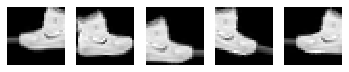

In [39]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train_sc_gen[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [40]:
x_train_sc.shape

(60000, 28, 28)

In [0]:
#creating the generator
gen=datagen.flow(np.expand_dims(x_train_sc,-1), y=y_train_enc)
gen_test = datagen.flow(np.expand_dims(x_test_sc,-1), y=y_test_enc)

In [0]:
#Creating a neew model since the data reshaping is not required here due to the generator function since it does the job of adding dimension & creating the layers & deploying it in the model
from keras.models import Sequential
model1 = Sequential()
model1.add(BatchNormalization(input_shape = (28,28,1)))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(keras.layers.Dense(128, activation='relu'))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.Dense(10, activation='softmax'))
model1.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics =['accuracy'])

In [54]:
#Using the fit_geneator() to fit the model
model1.fit_generator(gen,epochs=10,validation_data=(gen_test),callbacks = [call])

Epoch 1/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.8711 - acc: 0.6737 - val_loss: 0.6587 - val_acc: 0.7535
Epoch 2/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6511 - acc: 0.7554 - val_loss: 0.5787 - val_acc: 0.7854
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5875 - acc: 0.7827 - val_loss: 0.5352 - val_acc: 0.8027
Epoch 4/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5489 - acc: 0.7964 - val_loss: 0.5167 - val_acc: 0.8092
Epoch 5/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.5253 - acc: 0.8080 - val_loss: 0.4701 - val_acc: 0.8303
Epoch 6/10
1875/1875 [==============================] - 23s 12ms/step - loss: 0.5076 - acc: 0.8145 - val_loss: 0.4604 - val_acc: 0.8308
Epoch 7/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.4932 - acc: 0.8198 - val_loss: 0.4401 - val_acc: 0.8328
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [63]:
#Evaluating the model on the train set
tr_evaluation = model1.evaluate(gen)
print("The train loss of the model is {}% &\n train accuracy is {}%".format(tr_evaluation[0]*100,tr_evaluation[1]*100))

1875/1875 [==============================] - 16s 8ms/step
The train loss of the model is 39.9867470284303% &
 train accuracy is 85.07333333333334%


In [64]:
##Evaluating the model on the test set
te_evaluation = model1.evaluate(gen_test)
print("The test loss of the model is {}% & \n train accuracy is {}%".format(te_evaluation[0]*100,te_evaluation[1]*100))

313/313 [==============================] - 3s 8ms/step
The test loss of the model is 42.338797223567965% & 
 train accuracy is 84.76%


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
#importing the datasets from keras
from keras.datasets import cifar10
#Importing the ImageDataGenerator to specify various operations on the image or technically called Image Augmentation
from keras.preprocessing.image import ImageDataGenerator
#Importing the model
from keras.models import Sequential
#Importing the layers
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

### **Load CIFAR10 dataset**

In [68]:
#Loading the data directly in the train,test formats
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170500096/170498071 [==============================] - 6s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
#Creating the data_gen object for image augmentation
data_gen = keras.preprocessing.image.ImageDataGenerator(rotation_range=20,
                                                                 width_shift_range=0.2,
                                                                 height_shift_range=0.2,
                                                                 horizontal_flip=True,
                                                                 vertical_flip = True,
                                                                 validation_split=0.2)



### **Prepare/fit the generator.**

In [71]:
#Preparing & fitting the generator
gene=datagen.random_transform(x_train[2])
gene

array([[[253, 253, 253],
        [253, 253, 253],
        [253, 253, 253],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[255, 255, 255],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [253, 253, 253],
        [253, 253, 253],
        [253, 253, 253]],

       ...,

       [[ 69,  79,  80],
        [ 63,  76,  78],
        [ 58,  72,  75],
        ...,
        [115, 129, 105],
        [123, 143, 113],
        [128, 148, 117]],

       [[ 71,  81,  80],
        [ 63,  75,  77],
        [ 54,  69,  70],
        ...,
        [106, 120, 101],
        [112, 131, 105],
        [113, 133, 105]],

       [[ 68,  77,  75],
        [ 63,  76,  76],
        [ 57,  71,  72],
        ...,
        [108, 118, 107],
        [113, 123, 110],
        [112, 124, 108]]

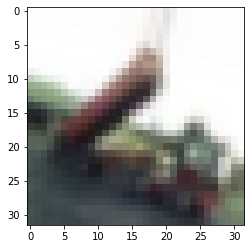

In [72]:
#Plotting the image
plt.imshow(gene)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

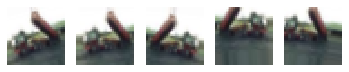

In [74]:
#Generating the 5 images for 1 of the images of the CIFAR10 train dataset
from matplotlib import pyplot as plt
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    gene=datagen.random_transform(x_train[2])
    plt.imshow(gene)
    plt.plot()
plt.show()